In [1]:
from langgraph.graph import StateGraph, END
from typing import Dict, Any, TypedDict

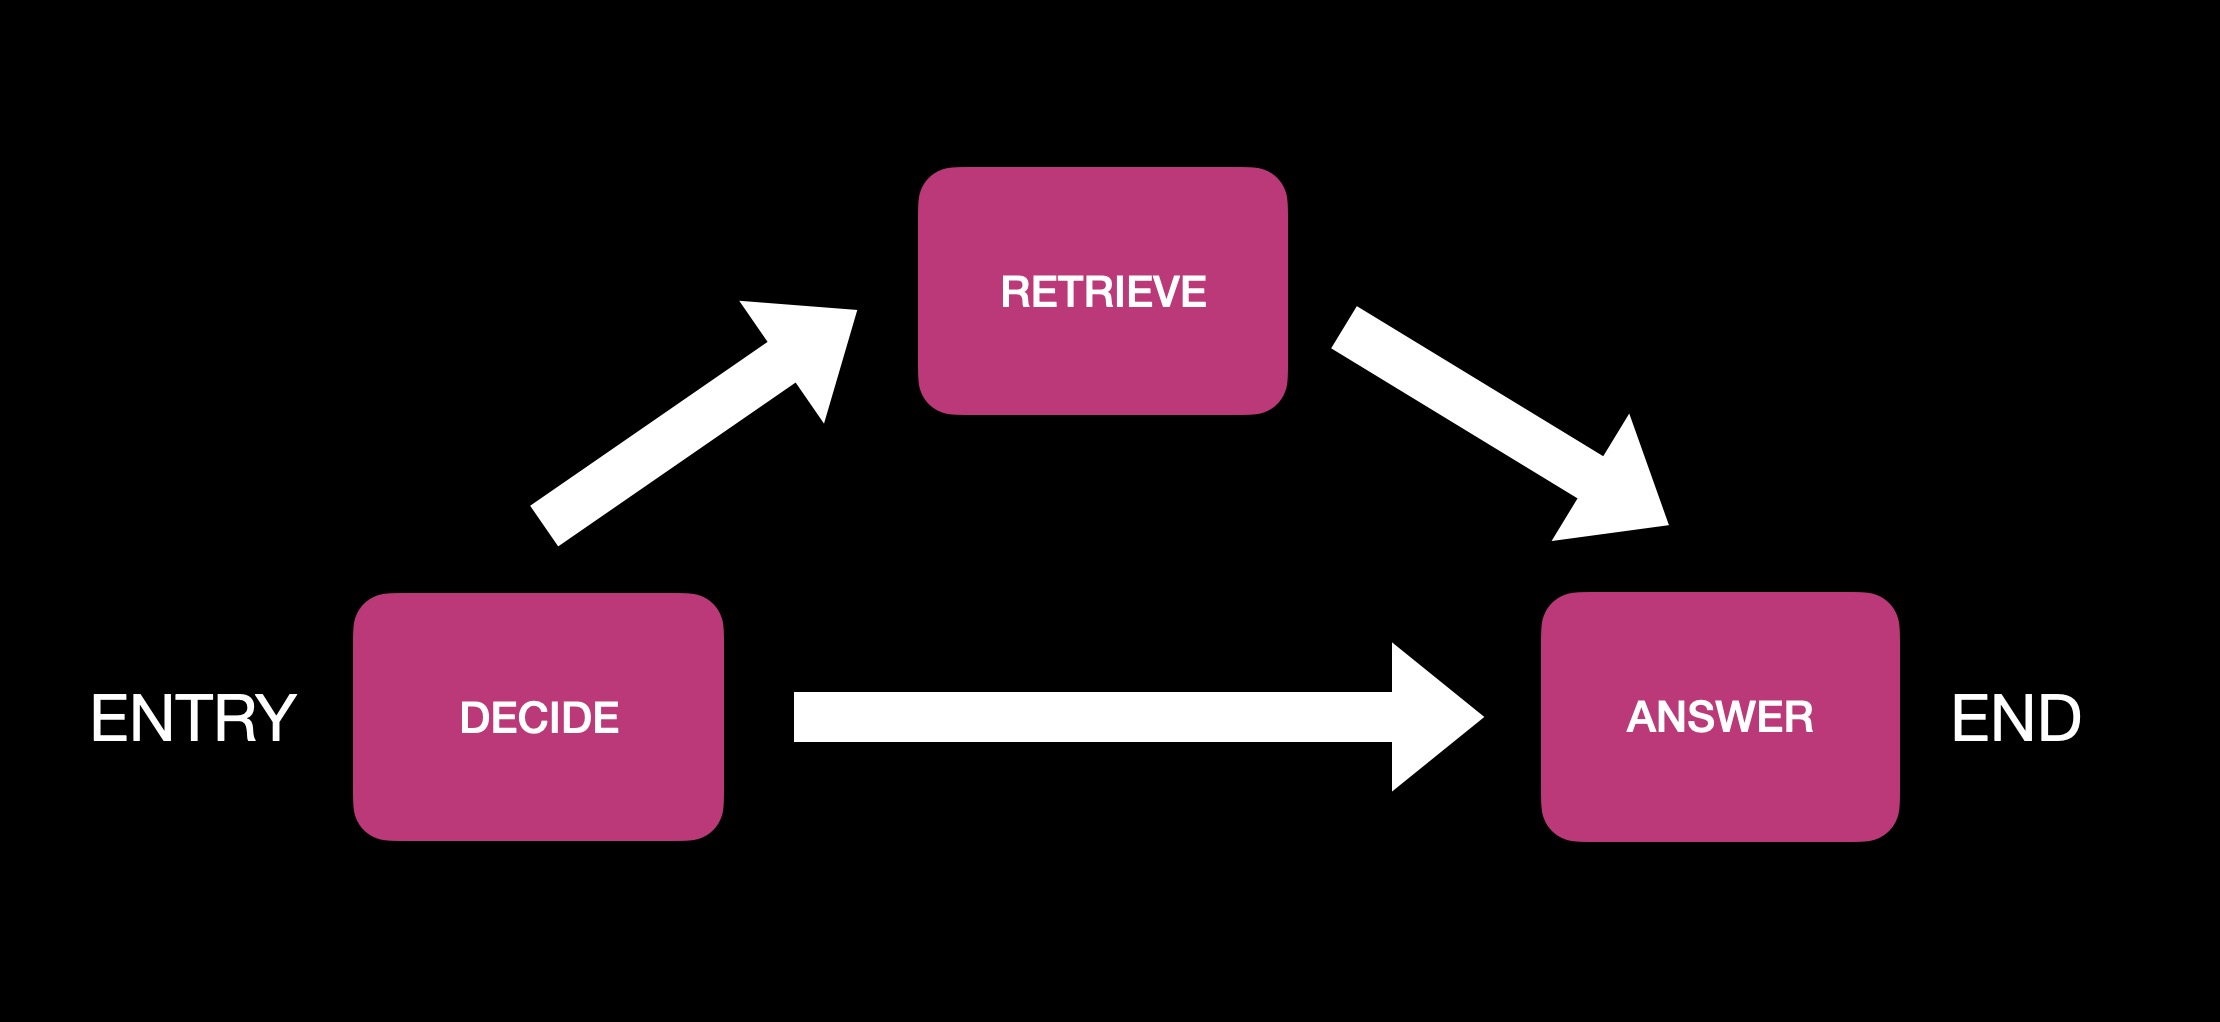

## Step 1: Define State Schema

In [2]:
class MyState(TypedDict):
    """
    State container that passes data between nodes.
    """
    input: str
    route: str
    docs: str
    output: str

## Step 2: Define Node Functions

In [3]:
def decide_node(state: MyState) -> MyState:
    """
    Decision node that determines routing based on input.
    
    Args:
        state: Current state containing user input
    
    Returns:
        Updated state with routing decision
    """
    user_input = state.get("input", "").lower()
    
    if "weather" in user_input:
        route = "retrieve"
        print(f"🔀 Routing to: {route} (weather question detected)")
    else:
        route = "answer"
        print(f"🔀 Routing to: {route} (general question)")
    
    # Return updated state
    return {**state, "route": route}

def retrieve_node(state: MyState) -> MyState:
    """
    Retrieval node that fetches relevant information.
    In real applications, this would:
    - Query a database
    - Call external APIs
    - Search vector databases
    """
    print("📡 Retrieving weather information...")
    
    # Simulate API call or database call
    weather_data = {
        "temperature": "22°C",
        "condition": "Sunny",
        "humidity": "45%",
        "location": "Delhi"
    }
    
    docs = f"Current weather in {weather_data['location']}: {weather_data['condition']}, {weather_data['temperature']}"
    return {**state, "docs": docs}

def answer_node(state: MyState) -> MyState:
    """
    Answer generation node that creates final response.
    In real applications, this would use an LLM to generate
    contextual answers based on retrieved information.
    """
    print("Generating answer...")
    
    # Check if we have retrieved documents
    if "docs" in state and state["docs"]:
        # Weather-specific answer using retrieved data
        answer = f"Based on current data: {state['docs']}"
        print("📋 Using retrieved information for answer")
    else:
        # General answer for non-weather questions
        answer = "I can help you with various questions. For weather information, please ask about the weather!"
        print("💬 Using general response")
    
    return {**state, "output": answer}

## Step 3: Build the Graph

In [4]:
def create_weather_bot_graph():
    """
    Creates and configures the LangGraph workflow.
    
    Returns:
        Compiled graph ready for execution
    """
    # Initialize graph builder
    builder = StateGraph(MyState)
    
    # Add nodes to the graph
    builder.add_node("decide", decide_node)
    builder.add_node("retrieve", retrieve_node)  
    builder.add_node("answer", answer_node)
    
    # Set entry point
    builder.set_entry_point("decide")
    
    # Add conditional edges based on routing decision
    builder.add_conditional_edges(
        "decide",  # Source node
        lambda state: state.get("route"),  # Condition function that returns route
        {
            "retrieve": "retrieve",  # If route == "retrieve", go to retrieve node
            "answer": "answer"       # If route == "answer", go to answer node
        }
    )
    
    # Add direct edge from retrieve to answer
    builder.add_edge("retrieve", "answer")
    
    # Add END edges to terminate the graph
    builder.add_edge("answer", END)
    
    # Compile the graph
    return builder.compile()

## Step 4: Usage Examples

In [5]:
def run_examples():
    """Demonstrates the graph with different inputs"""
    
    # Create the graph
    graph = create_weather_bot_graph()
    
    print("=" * 50)
    print("WEATHER BOT DEMO")
    print("=" * 50)
    
    # Example 1: Weather question
    print("\n Example 1: Weather Question")
    print("-" * 30)
    result1 = graph.invoke({"input": "What's the weather like today?"})
    
    if result1:
        print(f"Input: {result1.get('input', 'N/A')}")
        print(f"Route: {result1.get('route', 'N/A')}")
        print(f"Retrieved: {result1.get('docs', 'None')}")
        print(f"Output: {result1.get('output', 'N/A')}")
    else:
        print("Graph returned None")
    
    # Example 2: General question
    print("\nExample 2: General Question")
    print("-" * 30)
    result2 = graph.invoke({"input": "What is the capital of France?"})
    
    if result2:
        print(f"Input: {result2.get('input', 'N/A')}")
        print(f"Route: {result2.get('route', 'N/A')}")
        print(f"Retrieved: {result2.get('docs', 'None')}")
        print(f"Output: {result2.get('output', 'N/A')}")
    else:
        print("Graph returned None")
    
    # Example 3: Another weather question
    print("\nExample 3: Another Weather Question")
    print("-" * 30)
    result3 = graph.invoke({"input": "Is it going to rain? Check the weather."})
    
    if result3:
        print(f"Input: {result3.get('input', 'N/A')}")
        print(f"Route: {result3.get('route', 'N/A')}")
        print(f"Retrieved: {result3.get('docs', 'None')}")
        print(f"Output: {result3.get('output', 'N/A')}")
    else:
        print("Graph returned None")
        

## Step 5: Execution Flow Explanation

In [6]:
def explain_flow():
    """
    Explains how the graph execution works:
    
    1. START: graph.invoke({"input": "What's the weather?"})
    2. ENTRY: Execute decide_node with state {"input": "What's the weather?"}
    3. DECIDE: decide_node returns {"route": "retrieve"}
    4. STATE: State becomes {"input": "What's the weather?", "route": "retrieve"}
    5. ROUTE: LangGraph checks route value and goes to retrieve_node
    6. RETRIEVE: retrieve_node returns {"docs": "Current weather..."}
    7. STATE: State becomes {"input": "...", "route": "retrieve", "docs": "Current weather..."}
    8. FLOW: Automatic edge takes us to answer_node
    9. ANSWER: answer_node returns {"output": "Based on current data..."}
    10. FINAL: State becomes {"input": "...", "route": "retrieve", "docs": "...", "output": "Based on current data..."}
    """
    pass

if __name__ == "__main__":
    run_examples()

WEATHER BOT DEMO

 Example 1: Weather Question
------------------------------
🔀 Routing to: retrieve (weather question detected)
📡 Retrieving weather information...
Generating answer...
📋 Using retrieved information for answer
Input: What's the weather like today?
Route: retrieve
Retrieved: Current weather in Delhi: Sunny, 22°C
Output: Based on current data: Current weather in Delhi: Sunny, 22°C

Example 2: General Question
------------------------------
🔀 Routing to: answer (general question)
Generating answer...
💬 Using general response
Input: What is the capital of France?
Route: answer
Retrieved: None
Output: I can help you with various questions. For weather information, please ask about the weather!

Example 3: Another Weather Question
------------------------------
🔀 Routing to: retrieve (weather question detected)
📡 Retrieving weather information...
Generating answer...
📋 Using retrieved information for answer
Input: Is it going to rain? Check the weather.
Route: retrieve
Retri